## Morfometric measurements of neuromuscular junctions:
- elav
- elavxCg4190

In [2]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from skimage import color
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import spearmanr
from scipy.stats import shapiro

In [3]:
# my functions

def my_imshow(im, title=None, **kwargs):
    if 'cmap' not in kwargs:
        kwargs['cmap'] = 'gray'
    plt.figure()
    plt.imshow(im, interpolation='none', **kwargs)
    if title:
        plt.title(title)
    plt.axis('off')
    
    
def make_line_name_from_image(file_path):
    """From filename extracts line name"""
    """1. D.m. 20.03.2019 AF, DAPI, Brp elavXcg4190-3DAnimation-3.tif => elavXcg4190"""
    
    return file_path[file_path.find("elav"):file_path.find("-3D")]


def make_line_name_from_csv(file_path):
    """From csv filename extracts line name"""
    """2-elavcg-4=> elavXcg4190"""
    """2-elav-4 => elav"""
    if "elav-" in file_path:
        return "elav"
    elif "elavcg" in file_path:
        return "elavxCG4190"
    raise Exception('Unrecognized file path: ' + file_path)
    
def make_branches_from_csv(file_path):
    """csv contains number of branches in name"""
    return int(file_path[-5])

def number_of_buttons_in_csv(file_path):
    csv = pd.read_csv(file_path)
    return len(csv["Length"])

def radii_from_csv(file_path):
    csv = pd.read_csv(file_path)
    radii = []
    for radius in csv["Length"]:
        radii.append(round(((radius*30)/81)/2, 2))
    mean_radius = round(np.mean(radii), 2)
    std_radius = round(np.std(radii), 2)
    return radii, mean_radius, std_radius


def collect_all_data_from_csv(file_path):
    radii, mean_radius, std_radius = radii_from_csv(file_path)
    dictionary = {
        "line" : make_line_name_from_csv(file_path),
        "number of branches" : make_branches_from_csv(file_path),
        "number of buttons" : number_of_buttons_in_csv(file_path),
        "radii" : radii,
        "mean radius [um]": mean_radius,
        #"radii standard deviation" : std_radius # resinging form this parameter - not significant
    }
    return dictionary


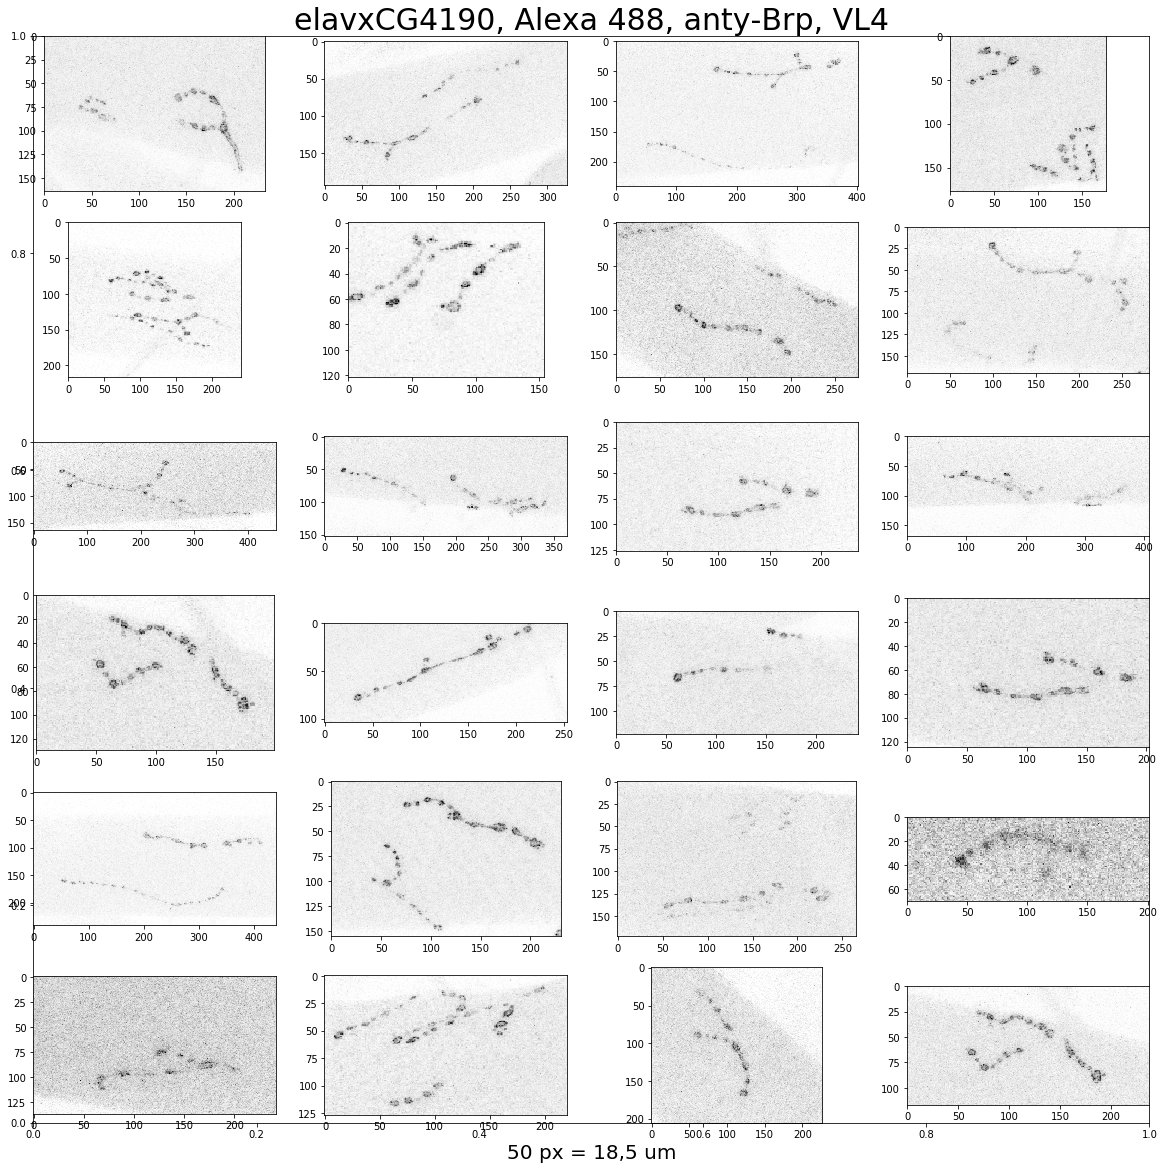

In [4]:
# Show all images
elav_cg_images = glob.glob("*elavXcg4190-3DAnimation*.tif")
fig = plt.figure(figsize=(20, 20))
plt.title("elavxCG4190, Alexa 488, anty-Brp, VL4",fontdict={"fontsize": 30})
plt.xlabel("50 px = 18,5 um", fontdict={"fontsize": 20})
subplots = fig.subplots(int(len(elav_cg_images)/4), 4).flatten()
for subplot, item in zip(subplots, elav_cg_images):
    im=plt.imread(item)
    im = color.rgba2rgb(im) # change rgba to rgb
    gray_im = color.rgb2gray(im)
    gray_im = im[:, :, 0]
    subplot.imshow(gray_im, cmap="binary")#.set_cmap('nipy_spectral')
#plt.savefig("elavxCG4190 Alexa, anty-Brp, VL4")

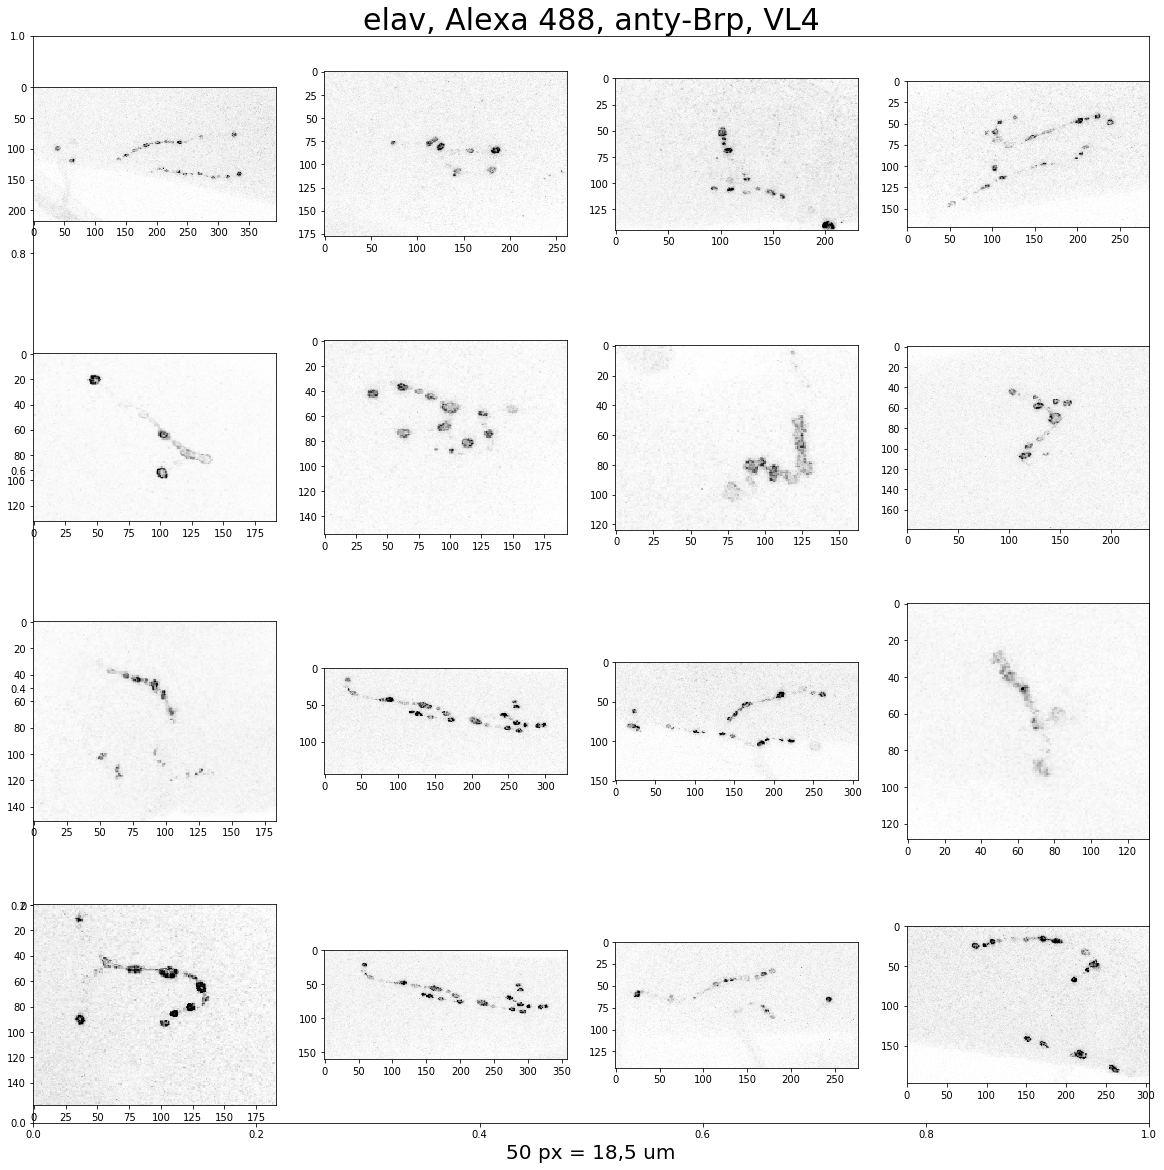

In [5]:
elav_cg_images = glob.glob("*elav-3DAnimation*.tif")
fig = plt.figure(figsize=(20, 20))
plt.title("elav, Alexa 488, anty-Brp, VL4",fontdict={"fontsize": 30})
plt.xlabel("50 px = 18,5 um", fontdict={"fontsize": 20})
subplots = fig.subplots(int(len(elav_cg_images)/4), 4).flatten()
for subplot, item in zip(subplots, elav_cg_images):
    im=plt.imread(item)
    im = color.rgba2rgb(im) # change rgba to rgb
    gray_im = color.rgb2gray(im)
    gray_im = im[:, :, 0]
    subplot.imshow(gray_im, cmap="binary")#.set_cmap('nipy_spectral')
#plt.savefig("elav Alexa, anty-Brp, VL4")

## All Data

In [6]:
records = []
for file_path in glob.glob("*elav*.csv"):
    records.append(collect_all_data_from_csv(file_path))
    
df = pd.DataFrame(records)
df = df.sort_values(by="line", ascending=False)
df.head()

,line,mean radius [um],number of branches,number of buttons,radii
21,elavxCG4190,0.98,6,18,"[1.24, 1.37, 1.22, 1.77, 0.95, 1.15, 0.81, 0.7..."
30,elavxCG4190,0.76,2,11,"[1.15, 0.58, 0.58, 0.38, 0.93, 0.79, 1.21, 0.8..."
28,elavxCG4190,1.12,3,18,"[1.13, 0.74, 1.35, 1.26, 0.86, 1.24, 1.55, 1.1..."
27,elavxCG4190,0.90,3,19,"[1.08, 0.81, 1.07, 0.52, 0.85, 0.98, 0.73, 0.6..."
32,elavxCG4190,1.21,2,7,"[1.57, 1.7, 1.13, 1.24, 0.78, 0.65, 1.38]"


In [7]:
# strange data distribution for number of branches - for the elav line all data cumulted on 3 branches
df.sort_values(by="number of branches")

,line,mean radius [um],number of branches,number of buttons,radii
11,elav,1.19,2,15,"[1.17, 0.68, 1.34, 0.88, 1.0, 1.26, 1.33, 1.13..."
14,elavxCG4190,0.91,2,14,"[1.26, 0.77, 0.64, 0.89, 0.72, 0.98, 0.88, 0.7..."
16,elavxCG4190,1.22,2,7,"[1.53, 1.26, 1.07, 1.14, 0.89, 1.17, 1.48]"
19,elav,1.33,2,8,"[1.41, 0.93, 1.34, 1.2, 1.49, 1.58, 0.99, 1.66]"
2,elav,1.07,2,7,"[1.16, 0.76, 1.02, 0.86, 1.11, 1.25, 1.34]"
22,elavxCG4190,0.91,2,12,"[1.13, 0.48, 0.89, 1.25, 0.97, 0.91, 1.33, 0.7..."
23,elavxCG4190,1.00,2,12,"[1.05, 0.69, 0.74, 1.23, 0.79, 1.4, 1.0, 1.07,..."
38,elavxCG4190,0.82,2,33,"[0.62, 0.74, 0.37, 0.74, 0.39, 0.49, 0.62, 0.3..."
32,elavxCG4190,1.21,2,7,"[1.57, 1.7, 1.13, 1.24, 0.78, 0.65, 1.38]"
3,elav,1.09,2,10,"[1.35, 1.35, 1.32, 0.92, 0.44, 0.76, 0.85, 0.9..."


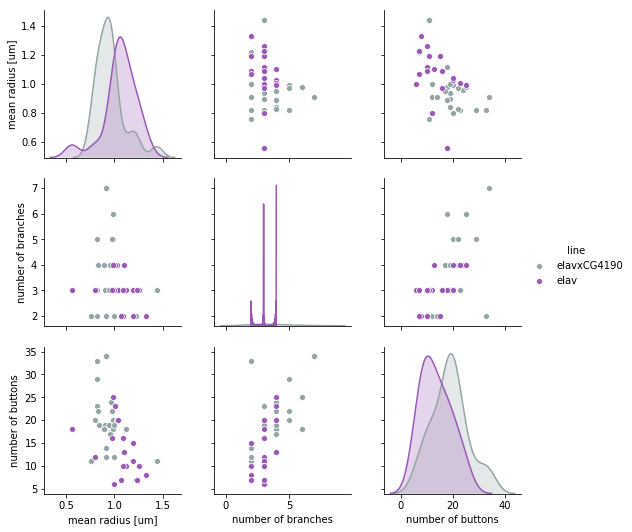

In [29]:
palette = ["#95a5a6", "#9b59b6"]
sns.pairplot(df, hue="line", palette=palette)
plt.savefig("dependencies")

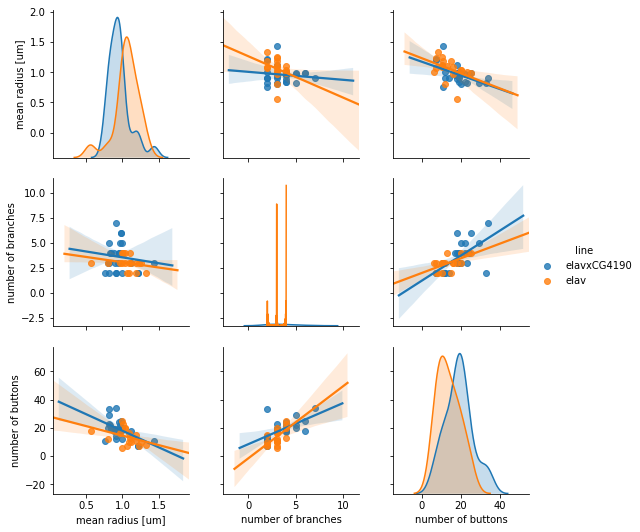

In [9]:
sns.pairplot(df, hue="line", kind="reg")

In [10]:
# plot above shows linear reggression for number buttons/ mean radius and number of buttons/number of branches

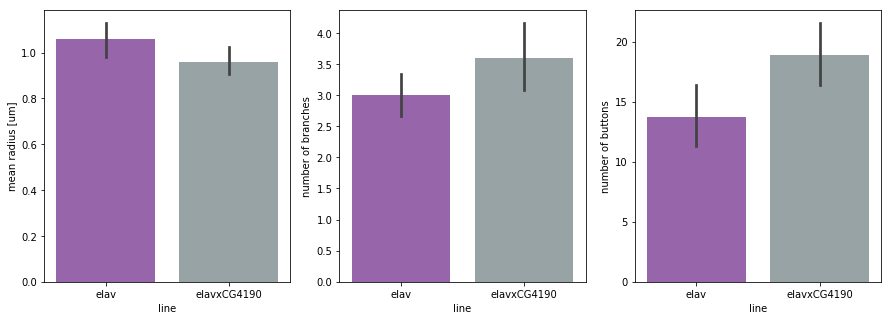

In [28]:
exp = ['mean radius [um]', 'number of branches', 'number of buttons']
palette=[ "#9b59b6", "#95a5a6"]
order = ["elav", "elavxCG4190"]
def plots(kind):
    
    fig = plt.figure(figsize=(15, 5))
    
    axes = fig.subplots(1, 3).flatten()
    for i, y in enumerate(exp):
        p = sns.catplot(data=df, x="line", y=y, kind=kind, ax=axes[i], palette=palette, order=order)
        plt.close(p.fig)
        
plots("bar")
# plt.savefig("behavioral_tests_plot-elav")

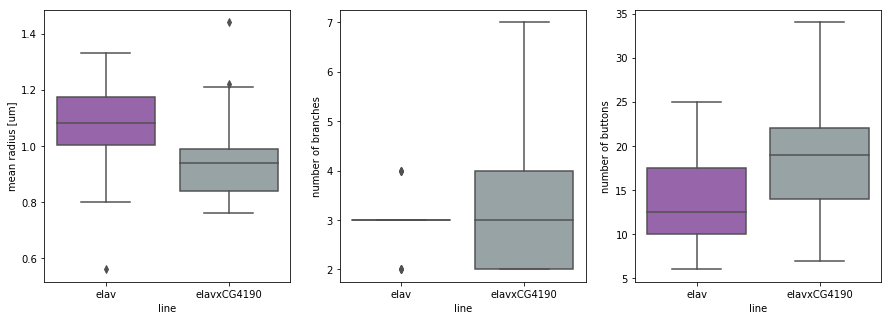

In [26]:
plots("box")
 # plt.savefig("boxes")

In [13]:
df[df.line=="elavxCG4190"].describe()
len(df[df.line=="elav"])

18

In [14]:
exp = ['mean radius [um]', 'number of branches', 'number of buttons']

for i in exp:
    print(str(i))
    print(ttest_ind(df[df.line=="elav"][i],
          df[df.line=="elavxCG4190"][i]))



mean radius [um]
Ttest_indResult(statistic=2.0023843755465, pvalue=0.05188724758537222)
number of branches
Ttest_indResult(statistic=-1.6319288158446013, pvalue=0.11035282855796744)
number of buttons
Ttest_indResult(statistic=-2.5949818153543665, pvalue=0.013065024538604229)


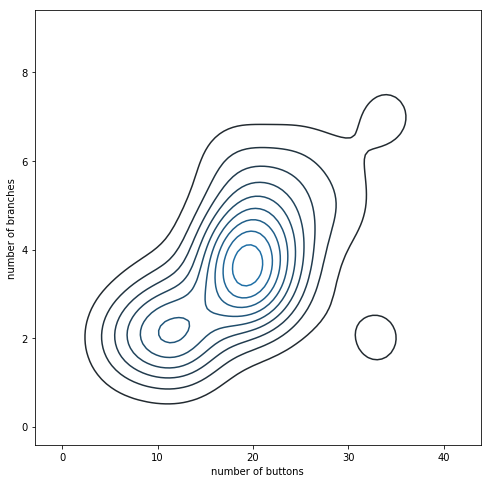

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


# Subset the iris dataset by species
elav = df.query("line == 'elav'")
elav_cg = df.query("line == 'elavxCG4190'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("auto")

# Draw the two density plots

ax = sns.kdeplot(elav_cg["number of buttons"], elav_cg["number of branches"],
                 ax=ax)
#ax = sns.kdeplot(elav["number of buttons"], elav["number of branches"],
#                 ax=ax)

# Add labels to the plot
#red = sns.color_palette("Reds")[-2]
#blue = sns.color_palette("Blues")[-2]
#ax.text(2.5, 8.2, "elav", size=16, color=blue)
#ax.text(3.8, 4.5, "elavxCG4190", size=16, color=red)

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1203: Runtim

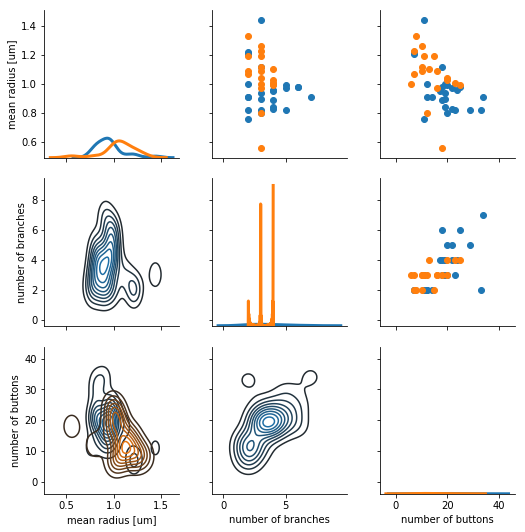

In [16]:
g = sns.PairGrid(df, hue="line")
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot, lw=3, legend=False)

/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/anaconda3/lib/python3.7/s

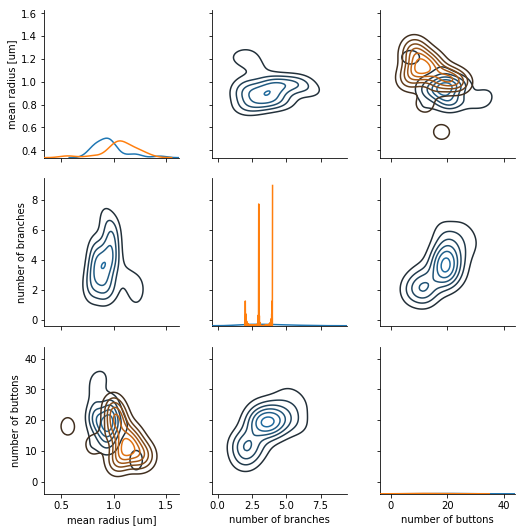

In [17]:
g = sns.PairGrid(df, hue="line")
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

In [18]:
df

,line,mean radius [um],number of branches,number of buttons,radii
21,elavxCG4190,0.98,6,18,"[1.24, 1.37, 1.22, 1.77, 0.95, 1.15, 0.81, 0.7..."
30,elavxCG4190,0.76,2,11,"[1.15, 0.58, 0.58, 0.38, 0.93, 0.79, 1.21, 0.8..."
28,elavxCG4190,1.12,3,18,"[1.13, 0.74, 1.35, 1.26, 0.86, 1.24, 1.55, 1.1..."
27,elavxCG4190,0.90,3,19,"[1.08, 0.81, 1.07, 0.52, 0.85, 0.98, 0.73, 0.6..."
32,elavxCG4190,1.21,2,7,"[1.57, 1.7, 1.13, 1.24, 0.78, 0.65, 1.38]"
25,elavxCG4190,0.82,3,23,"[1.08, 0.94, 0.75, 0.84, 0.81, 0.69, 1.17, 1.0..."
24,elavxCG4190,0.80,3,20,"[0.79, 0.51, 0.82, 0.85, 0.59, 0.7, 0.68, 0.94..."
23,elavxCG4190,1.00,2,12,"[1.05, 0.69, 0.74, 1.23, 0.79, 1.4, 1.0, 1.07,..."
22,elavxCG4190,0.91,2,12,"[1.13, 0.48, 0.89, 1.25, 0.97, 0.91, 1.33, 0.7..."
1,elavxCG4190,0.82,5,29,"[1.09, 0.57, 0.76, 0.43, 0.91, 0.72, 0.54, 0.5..."


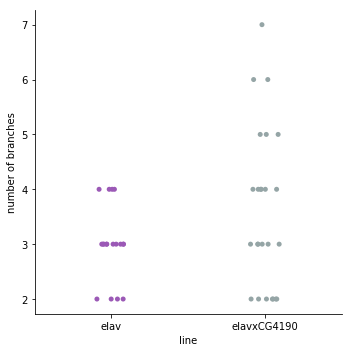

In [27]:
#sns.jointplot(x="number of buttons", y="number of branches", data=df, hue="line");
sns.catplot(data=df, x="line", y="number of branches", palette=palette, order=order)
#sns.catplot(data=df, x="line", y="number of branches", kind="violin", palette=palette)
plt.savefig("number of branches clusters.png")